<a href="https://colab.research.google.com/github/sebswU/cf-python/blob/master/botTrainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the playground section for different models and datasets

In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [ ]:
import tensorflow
from tensorflow import keras
import urllib


preprocess, getting and dividing data, naming classes

In [ ]:
fashion = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_train_test, y_train_test) = fashion.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
#make it to be between 0-1 not 0-255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
class_names[y_train[0]]
y_train[0]

4

Practice sequential model design

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 16s 8ms/step - loss: 0.6980 - accuracy: 0.7713 - val_loss: 0.4954 - val_accuracy: 0.8332
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4835 - accuracy: 0.8314 - val_loss: 0.4307 - val_accuracy: 0.8556
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4392 - accuracy: 0.8465 - val_loss: 0.4268 - val_accuracy: 0.8498
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4126 - accuracy: 0.8555 - val_loss: 0.3904 - val_accuracy: 0.8668
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3926 - accuracy: 0.8620 - val_loss: 0.3964 - val_accuracy: 0.8632
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3765 - accuracy: 0.8672 - val_loss: 0.3903 - val_accuracy: 0.8596
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3635 - accuracy: 0.8708 - val_loss: 0.3725 - val_accura

In [ ]:
import sklearn as sk
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test,y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit(X_valid)
X_test = scaler.transform(X_test)


Install tensorflow text

In [ ]:
%pip install tensorflow-text


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 115.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 47.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fo

Experimentation with potential model design for Covifacts

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text as text
from tensorflow import keras
import json
import sklearn

KeyError: ignored

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)#do not fit_transform validation set
x_test = scaler.transform(X_test)

In [ ]:
input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs = [input_A, input_B],outputs=[output])

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  model.add(keras.layers.InputLayer(input_shape=input_shape))
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation = 'relu'))
  model.add(keras.layers.Dense(1))
  optimizer = keras.optimizers.SGD(learning_rate = learning_rate)
  model.compile(loss = 'mse', optimizer = optimizer)
  return model


In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)#can be used on

<ipython-input-29-e8b4df3596ed>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)#can be used on


In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])
"""
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data = (X_valid, y_valid),
              callbacks = [keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)
"""

Epoch 1/100
242/242 [==============================] - 5s 7ms/step - loss: 3.1326 - val_loss: 1.7288
Epoch 2/100
242/242 [==============================] - 1s 4ms/step - loss: 1.2528 - val_loss: 1.0123
Epoch 3/100
242/242 [==============================] - 2s 7ms/step - loss: 0.9296 - val_loss: 0.8928
Epoch 4/100
242/242 [==============================] - 1s 6ms/step - loss: 0.8309 - val_loss: 0.8396
Epoch 5/100
242/242 [==============================] - 1s 6ms/step - loss: 0.7876 - val_loss: 0.8053
Epoch 6/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7609 - val_loss: 0.7803
Epoch 7/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7408 - val_loss: 0.7600
Epoch 8/100
242/242 [==============================] - 1s 5ms/step - loss: 0.7240 - val_loss: 0.7423
Epoch 9/100
242/242 [==============================] - 1s 4ms/step - loss: 0.7095 - val_loss: 0.7268
Epoch 10/100
242/242 [==============================] - 1s 5ms/step - loss: 0.6959 - val_lo

In [ ]:
"""
with open('textData.json') as textData:
  data = json.load(textData)
"""
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
    trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].

In [ ]:
#model
input = pooled_output
hl1 = keras.layers.Dense(40, activation = 'relu')(input)

hl2 = keras.layers.Dense(40, activation = 'relu')(hl1)
hl3 = keras.layers.Dense(10, activation = 'relu')(hl2)
concat = keras.layers.Concatenate()([input, hl3])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input], outputs = [output])
optimizer = keras.optimizers.SGD(clipvalue = 1.0)
model.compile(loss = ['mse'], optimizer = optimizer)
#loss function is mean squared error, optimizer is stochastic gd
model.save('test_model.h5')

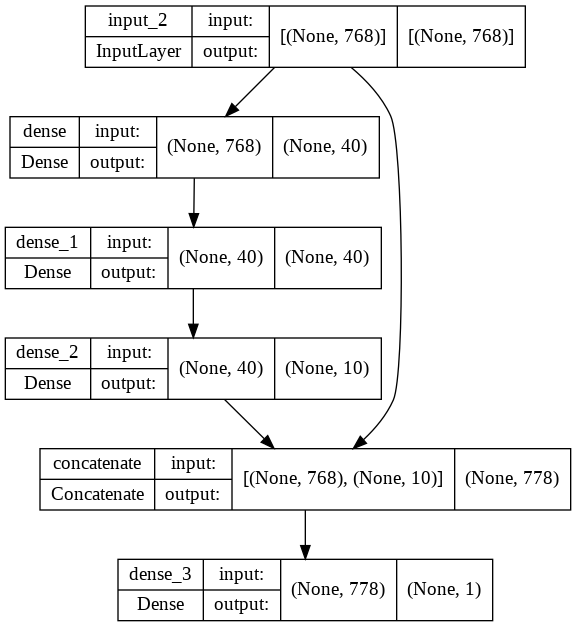

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from tensorflow.keras import utils
import pathlib
from tensorflow.keras.layers import TextVectorization
#utils, pathlib, urllib is used for loading stuff in

import os
import numpy as np

vocab_size = 88544
max_length = 250
batch_size = 64
(trainData, trainLabel),(testData, testLabel) = imdb.load_data(num_words = vocab_size)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
trainData = sequence.pad_sequences(trainData, max_length)
testData = sequence.pad_sequences(testData, max_length)
#for the freecodecamp seq rnn

In [ ]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec
BUFFER_SIZE = 10000#how many experiences/instances should be collected before doing anything regarding training
BATCH_SIZE = 64#separate training dataset into sizes of x instances
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
#for the tf seq rnn

In [ ]:
VOCABSIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCABSIZE
)
encoder.adapt(train_dataset.map(lambda text, label: text))
#sets layer vocabulary tokens and pads if neccessary
vocab = np.array(encoder.get_vocabulary())
vocab[:20]
#sometimes not reversible due to unknown tokens and lack of character-based fallback

NameError: ignored

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),#can go forward/back
    tf.keras.layers.Dense(64, activation='relu'),#
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
history=model.fit(train_dataset, epochs=10, validation_data=test_dataset, validation_steps=30)

Epoch 1/10
391/391 [==============================] - 48s 91ms/step - loss: 0.6312 - accuracy: 0.5826 - val_loss: 0.4602 - val_accuracy: 0.7896
Epoch 2/10
391/391 [==============================] - 33s 83ms/step - loss: 0.3912 - accuracy: 0.8222 - val_loss: 0.3587 - val_accuracy: 0.8484
Epoch 3/10
391/391 [==============================] - 33s 83ms/step - loss: 0.3398 - accuracy: 0.8512 - val_loss: 0.3382 - val_accuracy: 0.8484
Epoch 4/10
391/391 [==============================] - 32s 81ms/step - loss: 0.3227 - accuracy: 0.8596 - val_loss: 0.3489 - val_accuracy: 0.8542
Epoch 5/10
391/391 [==============================] - 33s 82ms/step - loss: 0.3138 - accuracy: 0.8662 - val_loss: 0.3355 - val_accuracy: 0.8448
Epoch 6/10
391/391 [==============================] - 33s 84ms/step - loss: 0.3095 - accuracy: 0.8670 - val_loss: 0.3308 - val_accuracy: 0.8620
Epoch 7/10
391/391 [==============================] - 33s 82ms/step - loss: 0.3071 - accuracy: 0.8673 - val_loss: 0.3248 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

above = tensorflow rnn tutorial
below = tensorflow youtube freecodecamp tutorial


In [ ]:
def createRNNmodel(training, testing, size):
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(size, 32),#vectorize word tokens
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),#lstm cell
    tf.keras.layers.Dense(1, activation = 'sigmoid')]#output
    )
  return model

In [ ]:
RNN = createRNNmodel(trainData, testData, vocab_size)
RNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          2833408   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 2,841,761
Trainable params: 2,841,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
RNN.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
#can be either rmsprop or adam (this the freecodecamp one)
hist = RNN.fit(trainData, trainLabel, epochs = 10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 14s 12ms/step - loss: 0.4214 - acc: 0.8079 - val_loss: 0.3208 - val_acc: 0.8670
Epoch 2/10
625/625 [==============================] - 7s 11ms/step - loss: 0.2404 - acc: 0.9093 - val_loss: 0.2703 - val_acc: 0.8898
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1871 - acc: 0.9311 - val_loss: 0.2711 - val_acc: 0.8960
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1520 - acc: 0.9467 - val_loss: 0.2859 - val_acc: 0.8796
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.1285 - acc: 0.9553 - val_loss: 0.2968 - val_acc: 0.8962
Epoch 6/10
625/625 [==============================] - 8s 13ms/step - loss: 0.1090 - acc: 0.9628 - val_loss: 0.3493 - val_acc: 0.8802
Epoch 7/10
625/625 [==============================] - 7s 11ms/step - loss: 0.0934 - acc: 0.9690 - val_loss: 0.3088 - val_acc: 0.8936
Epoch 8/10
625/625 [==============================] - 7s 12ms/step -

In [ ]:
word_index = imdb.get_word_index()
text = "my dog and i were offended by this movie i sued the director for his racist-dogist views"
def encode_text(text):#encodes words to number set 0 if no word has to be same
  tokens = keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens],max_length)[0]

"""
def decode_numbers(numbers):#decodes numbers if not 0 and sets back to letters
  padding = 0
  text = ""
  for num in numbers:
    if num != padding:
      text += reverse_word_index[num] + " "
  return text[:-1]
"""

encoded = encode_text(text)
print(encoded)


1654784/1641221 [==============================] - 0s 0us/step
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0 

In [ ]:
def predict(text):
  encodedText = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encodedText
  result = RNN.predict(pred)
  return result[0]

print(predict("According to all known laws of aviation, there is no way that a bee should be able to fly. Its wings are too small to get its fat little body off the ground. The bee, of course, flies anyway because bees don't care what humans think is impossible."))

[0.97073764]


## This is CNN learning playground :P

# This is the training for the actual nlp model


Credit for instructions on tokenizing/preprocessing/neural network planning:\
Marco Vasquez @ Kaggle\
Tim @ Youtube\
Auréilin Géron @ O'Reily Media\
Kylie Ying @ Freecodecamp.org\
tensorflow.org website\
FARES SAYAH @ Kaggle\
Hayawi K, Shahriar S, Serhani MA, Taleb I, Mathew SS. ANTi-Vax: a novel Twitter dataset for COVID-19 vaccine misinformation detection. Public Health. 2022;203:23-30. doi:10.1016/j.puhe.2021.11.022\
Samikshya Siwakoti, Kamya Yadav, Isra Thange, Nicola Bariletto, Luca Zanotti, Alaa Ghoneim, and Jacob N. Shapiro. Localized Misinformation in a Global Pandemic: Report on COVID-19 Narratives around the World. Empirical Study of Conflict, Princeton University, pages 1-68, March 2021. URL https://esoc.princeton.edu/publications/localized-misinformation-global-pandemic-report-covid-19-narratives-around-world. \



Credit for datasets:\
Poynter.org
Steven @ Kaggle
Princeton



In [ ]:
%pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 25.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Succ

import modules for preprocessing and model development

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!pip -q install transformers
import os
os.chdir('/content/drive/My Drive')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow_hub as hub
import sklearn as sk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.8 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


read and clean/preprocess data

1. load data from google drive

In [ ]:
os.chdir('/content/drive/My Drive/archive (1)')
import pandas as pd
databox = pd.DataFrame(pd.read_csv('news_articles.csv'))
more_false_data = pd.DataFrame(pd.read_csv('poynter_data.csv'))
esocData = pd.DataFrame(pd.read_csv('esoc.csv'))
nlmData = pd.DataFrame(pd.read_csv('ids.csv'))
trueorfalsenlm = pd.DataFrame(pd.read_csv('VaxMisinfoData.csv'))

In [ ]:
trueorfalsenlm

,id,is_misinfo
0,1344795424855642112,0
1,1344794858133860353,0
2,1344794822691983360,0
3,1344794752819077123,1
4,1344792070507134977,0
...,...,...
15068,1413087751474397186,0
15069,1413087030578401283,0
15070,1413085793397186565,1
15071,1413085519710363648,0


some data and labels are separate datasets so this will concatenate them together

In [ ]:
trueorfalsenlm = trueorfalsenlm.assign(text=nlmData['text'])


See how they are all structured


2. Clean data


*   tweet id was not needed in nlm dataset
*   the name label will be used in all datasets to represent the column for label (0 as real, 1 as fake, due to the goal of detecting false data)
*   nlm dataset was messed up after a certain point, was trimmed
*   databox dataset had string labels, convert to number
*   databox dataset will be added by instance to train, so delete all irrelevant
*   rename databox column to standardize all data column names to 'text'
*   esoc data was also messed up after instance 6000 so it was trimmed too
*   more_false_data needed a label column so a Pandas Series of 1.0s were added
*   esoc data has irrelevant columns, those were deleted
*   esoc data based on researching TYPES of misinfo, so all instances are false; labels are all 1.0s
*   rename esoc text column to 'text' to standardize for the merging



In [ ]:
trueorfalsenlm = trueorfalsenlm.drop(axis = 1, columns = ['id'])
trueorfalsenlm['is_misinfo'] = trueorfalsenlm['is_misinfo'].astype(float)
trueorfalsenlm.rename(columns = {'is_misinfo':'label'}, inplace = True)
trueorfalsenlm = trueorfalsenlm[:12381]

In [ ]:
databox['label'].replace ({'Fake': 1, 'Real': 0}, inplace=True)
databox = databox.drop(axis = 1, columns = ['author','published','title','text','language','site_url','main_img_url','type','title_without_stopwords','hasImage'])
databox.rename(columns = {'text_without_stopwords':'text'}, inplace = True)

databox.head()


,label,text
0,0.0,print pay back money plus interest entire fami...
1,0.0,attorney general loretta lynch plead fifth bar...
2,0.0,red state fox news sunday reported morning ant...
3,0.0,email kayla mueller prisoner tortured isis cha...
4,0.0,email healthcare reform make america great sin...


In [ ]:
more_false_data.head()
more_false_data['label'] = float(1)
more_false_data

,label,text
0,1.0,A post that has a list of recommendations to ...
1,1.0,The first person to received a Chinese COVID-...
2,1.0,A video from family doctor Natalia Prego Canc...
3,1.0,RNA-based COVID-19 vaccines can turn humans i...
4,1.0,A post that shows a doctor from Santiago del ...
...,...,...
7539,1.0,The coronavirus was created in a lab and pate...
7540,1.0,A Chinese market caused the new coronavirus (...
7541,1.0,The peak of the new coronavirus will happen i...
7542,1.0,Stores and supermarkets in Veracruz (Mexico) ...


In [ ]:
esocData = esocData[:5613]
esocData = esocData.assign(label=float(1))
newPD = pd.DataFrame()
esocData['Primary_Language']

0          English
1          English
2          English
3          English
4          English
           ...    
5608    Portuguese
5609    Portuguese
5610    Portuguese
5611    Portuguese
5612    Portuguese
Name: Primary_Language, Length: 5613, dtype: object

In [ ]:
esocData.drop(axis = 1, columns = ['s_no','Notes','Region','Reported_On','Additional_Reporting','Retrieve_from_1','Retrieve_from_2','Retrieve_from_3','Twitter_Reference','Direct_Post_1','Direct_Post_2','Direct_Post_3','Direct_Post_4','Title','Publication_Date','Entry_Date','Primary_Country','Secondary_Country','Primary_Language','Secondary_Language','Main_Narrative','Recoded_Main_Narrative','Recoded_Narrative_Coder','ChainMsg_or_Email','Motive','Motive_Description','Source','Source_Description','Distrib_Channel','Misinfo_Type','Key_Words','Summary','Coder'], inplace=True)
esocData.rename(columns = {'Narrative_Description':'text'}, inplace = True)

In [ ]:
#esocData = esocData.iloc[:, [1,0]]
esocData

,text,label
0,Hindi language YouTube account saying COVID-19...,1.0
1,Twitter user posting a compilation video of pe...,1.0
2,Twitter user posting a video of a celebrity ea...,1.0
3,Chain message of NYPD containment responses.,1.0
4,Chain message of Indian Health Ministry respon...,1.0
...,...,...
5608,Coffee can prevent COVID-19,1.0
5609,The number of COVID-19 deaths is 946,1.0
5610,Facemasks donated by China contain the virus,1.0
5611,low-quality masks were distributed by the Braz...,1.0


concatenate the dataset before applying the address remover because addresses and handles are common on multiple datasets

In [ ]:
data = pd.concat([databox, esocData, trueorfalsenlm, more_false_data])
data

,label,text
0,0.0,print pay back money plus interest entire fami...
1,0.0,attorney general loretta lynch plead fifth bar...
2,0.0,red state fox news sunday reported morning ant...
3,0.0,email kayla mueller prisoner tortured isis cha...
4,0.0,email healthcare reform make america great sin...
...,...,...
7539,1.0,The coronavirus was created in a lab and pate...
7540,1.0,A Chinese market caused the new coronavirus (...
7541,1.0,The peak of the new coronavirus will happen i...
7542,1.0,Stores and supermarkets in Veracruz (Mexico) ...


remove @, 'photo by name/Getty images',dates, links

In [ ]:
import re
import string

#TODO: strip the dataset of all emails, twitter acc prof, image references, capital letters
web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
user = re.compile(r"(?i)@[a-z0-9_]+")
regex_list = [web_address, user]
# we then use the sub method to replace anything matching

def clean(dataset):
  """clean from stopwords and other stuff, convert to list, back to string"""
  if isinstance(dataset, float):
    dataset = 'a'
  STOPWORDS = stopwords.words('english')
    # Check characters to see if they are in punctuation
  nopunc = [char for char in dataset if char not in string.punctuation and all(regex.search(char.lower()) is None for regex in regex_list)]

    # Join the characters again to form the string.
  nopunc = ''.join(nopunc)

    # Now just remove any stopwords
  return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])
  return " ".join(word
                for word in nopunc.split()
                if word.lower() not in stopwords.words("english") and all(regex.search(word.lower()) is None for regex in regex_list))

In [ ]:
esocData['text'] = esocData['text'].apply(clean)
trueorfalsenlm['text'] = trueorfalsenlm['text'].apply(clean)
more_false_data['text'] = more_false_data['text'].apply(clean)

In [ ]:
esocData[esocData['label']!=0.0]

,text,label
0,Hindi language YouTube account saying COVID19 ...,1.0
1,Twitter user posting compilation video people ...,1.0
2,Twitter user posting video celebrity eating ba...,1.0
3,Chain message NYPD containment responses,1.0
4,Chain message Indian Health Ministry responses,1.0
...,...,...
5608,Coffee prevent COVID19,1.0
5609,number COVID19 deaths 946,1.0
5610,Facemasks donated China contain virus,1.0
5611,lowquality masks distributed Brazilian government,1.0


In [ ]:
data = pd.concat([esocData, trueorfalsenlm, more_false_data, databox], sort = False, ignore_index = True)
data = data.iloc[:27584]
data = data.fillna(0)
data['label'] = data['label'].astype(int)
data = data[['label','text']]

In [ ]:
data[data['label'] == 1]

,label,text
0,1,Hindi language YouTube account saying COVID19 ...
1,1,Twitter user posting compilation video people ...
2,1,Twitter user posting video celebrity eating ba...
3,1,Chain message NYPD containment responses
4,1,Chain message Indian Health Ministry responses
...,...,...
27526,1,democrats perpetually circle wagons republican...
27527,1,election crossroads socialism capitalism exclu...
27528,1,print applaud integrity condemn selling allow ...
27529,1,new country women minorities hit hardest ann c...


In [ ]:
import numpy as np
train, val, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

In [ ]:
train.text

18816    Brazilian states receive R 16450 extra funding...
17294    Got second vaccine I’m good go👍 httpstcoZnLvxL...
14313    take birth control don’t worry what’s dat vaccine
20311    Ghana Education Service confirms date schools ...
2804      independent MLA advised people get COVID19 tests
                               ...                        
11135    got first dose Pfizer vaccine today hoped feel...
1744     China participated promotion false information...
20646    post shared repeatedly Facebook Sri Lankan Fac...
22859    Paraguayans go “even buy bread” incubation per...
6001     Received first dose Pfizer COVID19 vaccine tod...
Name: text, Length: 16550, dtype: object

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  """returns a PrefetchDataset object with instances truncated to batch_size"""
  df = dataframe.copy()
  labels = df.pop('label')
  df = df['text']
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [ ]:
train

,label,text
18816,1,Brazilian states receive R 16450 extra funding...
17294,1,Got second vaccine I’m good go👍 httpstcoZnLvxL...
14313,0,take birth control don’t worry what’s dat vaccine
20311,1,Ghana Education Service confirms date schools ...
2804,1,independent MLA advised people get COVID19 tests
...,...,...
11135,0,got first dose Pfizer vaccine today hoped feel...
1744,1,China participated promotion false information...
20646,1,post shared repeatedly Facebook Sri Lankan Fac...
22859,1,Paraguayans go “even buy bread” incubation per...


In [ ]:
train = df_to_dataset(train)
val = df_to_dataset(val)
test = df_to_dataset(test)

In [ ]:
train

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

streamline the text, make all lowercase

checking dataset structure

split data into training and testing

count # of unique words

:The embeddings can be used as a piece to build a larger machine learning system that is able to draw insights about COVID-19 research.
last touch: the input layer has a max sequence of 100 bc discord messages rarely have more than 100 words/tokens (anecdotal)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
#english_sentences = tf.constant(["dog", "Puppies are nice.", "I enjoy taking long walks along the beach with my dog."])
"""
this is the reference for the encoder and the embedder
the preprocessor converts the words into an array that is fed to the model
the encoder takes it and converts it to unique # representation (like oneHot)
the embedding vectorizes the word-number combination in a way that emphasizes
context (think about dots on a 3d graph and those dots' location represented
context in regards to each other)
model will be trained on data, and embeddings will be fitted to accomodate
after saved, specialized embedding/encoding/trained model will process new data
outside of set

from stkovf: LSTM layers expect 3D input tensors, but Dense outputs only 2D
fix:
"""

text_input = tf.keras.layers.Input(shape=(100,), dtype=tf.string)

embed = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2",
                       input_shape = [], dtype=tf.string, trainable=True)

In [ ]:
list(train)[0][0]

<tf.Tensor: shape=(32,), dtype=string, numpy=
array([b'Claims Dr Anthony Fauci currently advising wearing face masks',
       b'plan get commissions sketched tomorrow get second vaccine wednesday die rest week',
       b'\xe2\x9a\xa0\xef\xb8\x8f\xe2\x9a\xa0\xef\xb8\x8f\xe2\x9a\xa0\xef\xb8\x8fWARNING\xe2\x9a\xa0\xef\xb8\x8f\xe2\x9a\xa0\xef\xb8\x8f\xe2\x9a\xa0\xef\xb8\x8f BOSTON coercing elderly getting experimental genetically modifying Covid agent call vaccine order get apartments services REAL FOLKS aunt lied given \xe2\x80\x9cCovid vaccine\xe2\x80\x9d',
       b'Claims Tanzania reported 16467 COVID19 cases 1293 deaths 118 recoveries',
       b'Suicide rates Berlin rose 300 percent lockdown',
       b'got second dose covid vaccine felt like crap woke',
       b'Trump claims COVID19 restrictions partisan ploy',
       b'Claim Dr Fauci said every American microchipped',
       b'Tips new coronavirus Holding breath drinking water',
       b'Person fainted subway station COVID19',
       

In [ ]:
model = tf.keras.Sequential()
model.add(embed)
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adamax',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model.evaluate(train)

518/518 [==============================] - 5s 3ms/step - loss: 0.6904 - accuracy: 0.5692


[0.6903591156005859, 0.5691843032836914]

In [ ]:
model.evaluate(val)

173/173 [==============================] - 1s 3ms/step - loss: 0.6913 - accuracy: 0.5710


[0.6912930011749268, 0.5709624886512756]

In [ ]:
hist = model.fit(train, epochs = 10, validation_data = val)

Epoch 1/10
518/518 [==============================] - 86s 162ms/step - loss: 0.6115 - accuracy: 0.6955 - val_loss: 0.5337 - val_accuracy: 0.7035
Epoch 2/10
518/518 [==============================] - 52s 101ms/step - loss: 0.4938 - accuracy: 0.7282 - val_loss: 0.4384 - val_accuracy: 0.7562
Epoch 3/10
518/518 [==============================] - 37s 71ms/step - loss: 0.4354 - accuracy: 0.7548 - val_loss: 0.4057 - val_accuracy: 0.7714
Epoch 4/10
518/518 [==============================] - 28s 55ms/step - loss: 0.4058 - accuracy: 0.7663 - val_loss: 0.3921 - val_accuracy: 0.7781
Epoch 5/10
518/518 [==============================] - 24s 47ms/step - loss: 0.3876 - accuracy: 0.7737 - val_loss: 0.3838 - val_accuracy: 0.7818
Epoch 6/10
518/518 [==============================] - 23s 45ms/step - loss: 0.3735 - accuracy: 0.7847 - val_loss: 0.3796 - val_accuracy: 0.7843
Epoch 7/10
518/518 [==============================] - 21s 40ms/step - loss: 0.3597 - accuracy: 0.7970 - val_loss: 0.3791 - val_accurac

In [ ]:
vectorizer = tf.keras.layers.TextVectorization(max_tokens = 2000)
vectorizer.adapt(train.map(lambda txt, label: txt))

In [ ]:
modeLSTM = tf.keras.Sequential([
  vectorizer,
  tf.keras.layers.Embedding(
      input_dim = len(vectorizer.get_vocabulary()),
      output_dim = 12,
      mask_zero = True
  ),
  tf.keras.layers.LSTM(12),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(1, activation = 'sigmoid')

])
modeLSTM.compile(optimizer=tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"
),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
#pytorch implementation of the above code
#(GENERATED FROM CHATGPT FOR FUN, DID NOT CREATE BY HAND)
import torch
import torch.nn as nn

class ModelLSTM(nn.Module):
    def __init__(self, input_dim, output_dim, embedding_dim, hidden_dim):
        super(ModelLSTM, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx=0, mask_zero=True)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        self.dense1 = nn.Linear(hidden_dim, 10)
        self.dropout = nn.Dropout(p=0.4)
        self.dense2 = nn.Linear(10, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x, (hidden, _) = self.lstm(x)
        x = self.dense1(hidden.squeeze(0))
        x = self.dropout(x)
        x = self.dense2(x)
        return x

# Create an instance of the model
model = ModelLSTM(input_dim=len(vectorizer.get_vocabulary()),
                  output_dim=1,
                  embedding_dim=12,
                  hidden_dim=12)

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-7)

In [ ]:


history = modeLSTM.fit(train, epochs=10, validation_data = val)

Epoch 1/10
518/518 [==============================] - 80s 140ms/step - loss: 0.0000e+00 - accuracy: 0.3008 - val_loss: 0.0000e+00 - val_accuracy: 0.3061
Epoch 2/10
518/518 [==============================] - 41s 79ms/step - loss: 0.0000e+00 - accuracy: 0.3004 - val_loss: 0.0000e+00 - val_accuracy: 0.3061
Epoch 3/10
518/518 [==============================] - 27s 53ms/step - loss: 0.0000e+00 - accuracy: 0.3004 - val_loss: 0.0000e+00 - val_accuracy: 0.3061
Epoch 4/10
518/518 [==============================] - 20s 38ms/step - loss: 0.0000e+00 - accuracy: 0.3004 - val_loss: 0.0000e+00 - val_accuracy: 0.3061
Epoch 5/10
486/518 [===========================>..] - ETA: 1s - loss: 0.0000e+00 - accuracy: 0.2998

In [ ]:
modeLSTM.evaluate(test)

173/173 [==============================] - 2s 9ms/step - loss: 0.4369 - accuracy: 0.7834


[0.43692976236343384, 0.7833967804908752]

The model actually works to an extent. Granted, the results are the inverse of the label predictions, but a general pattern is detected. There are some anomalies, like the score given to 'covid was created in a lab', but since some of the data date back to early in the pandemic and was conducted before more research was done on the virus, speculation and uncertainty of truth is expected. In addition, the model seems to skew more sensitive towards political messages rather than misinformation purely based on the charasteristics of the disease. The current tests have stopwords directly fed into the model, so perhaps that might tamper with the weights and biases that were tuned on the preprocessed dataset.

In [ ]:
model.predict(['bioweapon'])

1/1 [==============================] - 0s 73ms/step


array([[0.35603696]], dtype=float32)

In [ ]:
model.predict(['pelosi'])

1/1 [==============================] - 0s 27ms/step


array([[0.74125236]], dtype=float32)

In [ ]:
model.predict(['it is recommended that you get tested for covid if flu-like symptoms occur'])

1/1 [==============================] - 0s 33ms/step


array([[0.966005]], dtype=float32)

In [ ]:
model.predict(['i got vaccinated so it should be safe'])

1/1 [==============================] - 0s 27ms/step


array([[0.4906899]], dtype=float32)

In [ ]:
model.predict(['beach ball'])

1/1 [==============================] - 0s 29ms/step


array([[0.8127688]], dtype=float32)

In [ ]:
model.predict(['covid was created in a lab'])

1/1 [==============================] - 0s 29ms/step


array([[0.99525416]], dtype=float32)

In [ ]:
model.predict(['covid'])

1/1 [==============================] - 0s 29ms/step


array([[0.85981816]], dtype=float32)

In [ ]:
model.predict(['the vaccine is killing babies'])

1/1 [==============================] - 0s 27ms/step


array([[0.4099576]], dtype=float32)

In [ ]:
model.predict(['i think covid will give you cancer but im not sure'])

1/1 [==============================] - 0s 26ms/step


array([[0.4162552]], dtype=float32)

In [ ]:
model.predict(['yes covid will give you cancer'])

1/1 [==============================] - 0s 25ms/step


array([[0.5954191]], dtype=float32)

In [ ]:
model.predict(['the radical left is planning to decrease the older population with the vaccine'])

1/1 [==============================] - 0s 28ms/step


array([[0.5560514]], dtype=float32)

In [ ]:
model.predict(['covid fake propaganda populist theory vaccine bad'])

1/1 [==============================] - 0s 30ms/step


array([[0.34776455]], dtype=float32)

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

export_path = /tmp/1



In [ ]:
!ls -l {export_path}

total 180
drwxr-xr-x 2 root root   4096 Dec 26 05:59 assets
-rw-r--r-- 1 root root  10744 Dec 26 05:59 keras_metadata.pb
-rw-r--r-- 1 root root 159919 Dec 26 05:59 saved_model.pb
drwxr-xr-x 2 root root   4096 Dec 26 05:59 variables


In [ ]:
saved_model_cli show --dir {export_path} --all

SyntaxError: ignored

In [ ]:
tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
    )

In [ ]:
modeLSTM.save('modeLSTM')
#import tensorflowjs as tfjs

#checkpoint_path = "./checkpoints/cp-{epoch:05d}.ckpt"
#modeLSTM.save_weights(checkpoint_dir.format(epoch=0))
#tfjs.converters.save_keras_model(model, '/content/drive/My Drive/archive (1)')
#modeLSTM.save('/content/drive/My Drive/archive (1)', save_format = 'h5')

In [ ]:
%tensorflowjs_converter --input_format keras \ modelstuff/model.h5 \ modelstuff

UsageError: Line magic function `%tensorflowjs_converter` not found.


In [ ]:
import torch
from torch import nn

In [ ]:
num_input_features=784
num_output_features=10


class MLP(nn.module):
  def __init__(self, num_input_features, num_output_features):
    super(MLP, self).__init__()
    self.fc1=nn.Linear(num_input_features, 128)
    self.fc2=nn.Linear(128,64)
    self.fc3=nn.Linear(64, num_output_features)

  def forward(self,x):
    x = self.fc1(x)
    x = torch.relu(x)
    x = self.fc2(x)
    x = torch.relu(x)
    x = self.fc3(x)
    #no relu required bc it gives the final output
    return x

model = MLP(num_input_features, num_output_features)

model.train()

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters,lr=0.01)


